# IMC-Denoise: a content aware denoising pipeline to enhance imaging mass cytometry

Here we will show an example for denoising the images with marker CD14 from our own human bone marrow IMC dataset. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tp
from IMC_Denoise.IMC_Denoise_main.DIMR import DIMR
from IMC_Denoise.IMC_Denoise_main.DeepSNF import DeepSNF

Using TensorFlow backend.


### Load the pre-trained denoisng model for CD14

In [2]:
weights_name = "weights_144Nd-CD14.hdf5" # trained network weights name. 
weights_save_directory = None # location where 'weights_name' will be loaded. 
# If the value is None, the files will be loaded from the default directory.
is_load_weights = True # read from the saved one.
deepsnf = DeepSNF(weights_name = weights_name,
                  weights_dir = weights_save_directory, 
                  is_load_weights = is_load_weights)

Pre-trained model D:\IMC_Denoise\Jupyter_Notebook_examples\trained_weights\weights_144Nd-CD14.hdf5 loaded successfully.
Pre-calculated range value file D:\IMC_Denoise\Jupyter_Notebook_examples\trained_weights\weights_144Nd-CD14_range_val.npz loaded successfully.


### Load a raw CD14 image

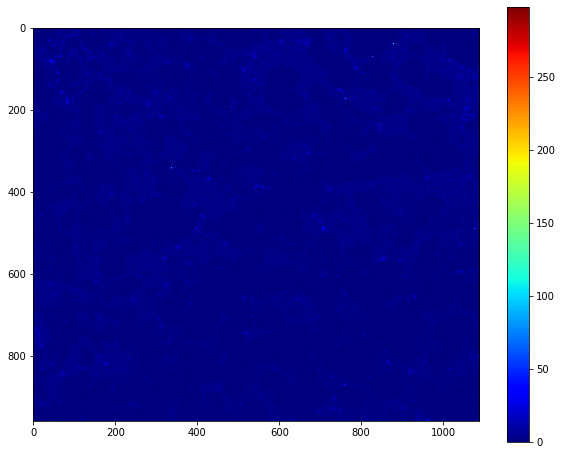

In [3]:
# read a CD14 raw image.
Raw_img_name = 'D:\IMC analysis\Raw_IMC_dataset\L\\144Nd-CD14_Nd144.tiff' # change to your raw image
Img_raw = tp.imread(Raw_img_name)
plt.figure(figsize = (10,8))
plt.imshow(Img_raw, vmin = 0, vmax = 0.5*np.max(Img_raw), cmap = 'jet')
plt.colorbar()
plt.show()

### Perform the DIMR algorithm only if the SNR of the raw image is high.

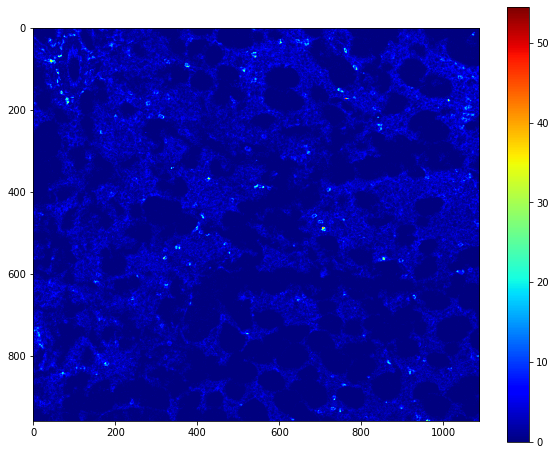

In [4]:
n_neighbours = 4 # Larger n enables removing more consecutive hot pixels. 
n_iter = 3 # Iteration number for DIMR
window_size = 3 # Slide window size. For IMC images, window_size = 3 is fine.
Img_DIMR = DIMR(n_neighbours = n_neighbours, n_iter = n_iter, window_size = window_size).perform_DIMR(Img_raw)
plt.figure(figsize = (10,8))
plt.imshow(Img_DIMR, vmin = 0, vmax = 0.5*np.max(Img_DIMR), cmap = 'jet')
plt.colorbar()
plt.show()

### If the SNR of the raw image is sub-optimal, perform DIMR and DeepSNF algorithms for low SNR raw images.
If errors happen, check if the GPUs are being used by other sessions. If yes, shutdown the session occupying GPUs and re-run the prediction.

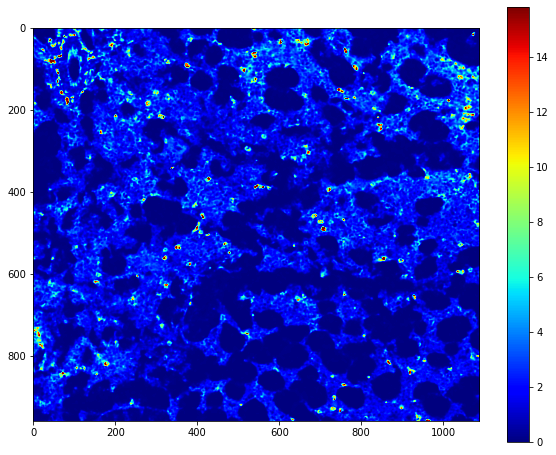

In [5]:
# perform DIMR and DeepSNF algorithms for low SNR raw images.
Img_DIMR_DeepSNF = deepsnf.perform_IMC_Denoise(Img_raw, n_neighbours = n_neighbours, n_iter = n_iter, window_size = window_size)
plt.figure(figsize = (10,8))
plt.imshow(Img_DIMR_DeepSNF, vmin = 0, vmax = 0.5*np.max(Img_DIMR_DeepSNF), cmap = 'jet')
plt.colorbar()
plt.show()